In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
from pprint import pprint

In [ ]:
n = 3600





In [201]:
def plot(t, y, title=None, step=None):
    plt.figure(figsize=(16, 6))
    plt.title(title, fontdict={"size": 20})
    plt.plot(t, y)
    if step:
        plt.xticks(t[::step])
    plt.grid(b=True, which='major', ls="--")
    plt.scatter(t, y, marker="x")
    plt.show()


def plot2(d1, d2, d1_title=None, d2_title=None):
    fig, [ax0, ax1] = plt.subplots(2, 1, figsize=(20, 10))
    ax0.plot(d1)
    ax0.set_title(d1_title, fontdict={"size": 20})
    ax0.grid(True)
    ax1.plot(d2)
    ax1.set_title(d2_title, fontdict={"size": 20})
    ax1.grid(True)
    plt.show()

fs=30.0Hz
f0=1.0Hz


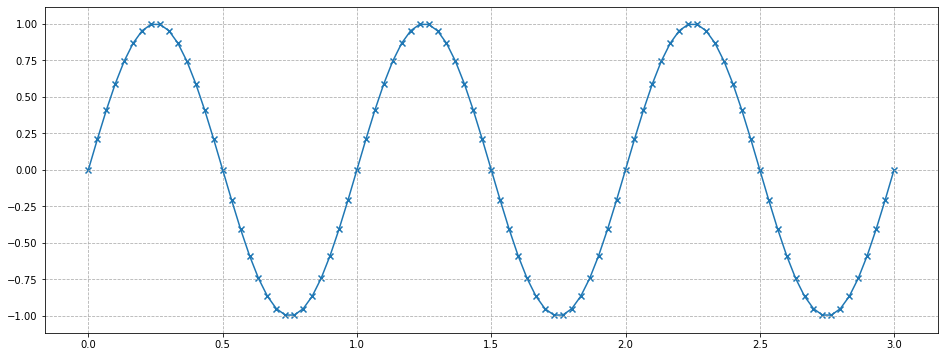

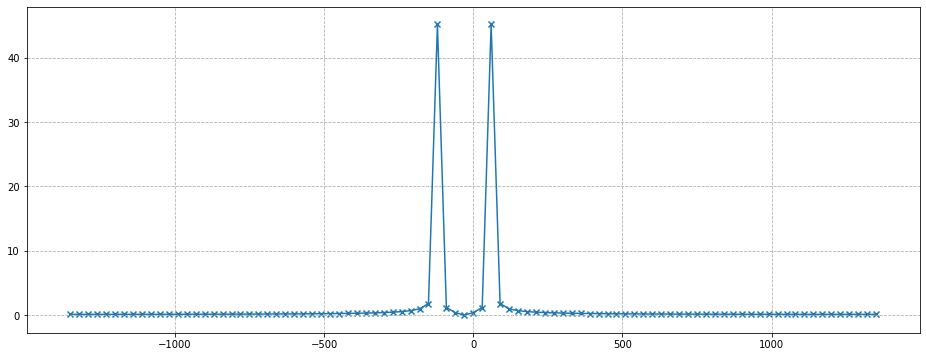

3


In [217]:
t = np.linspace(start=0, stop=3, num=91)  # seconds
fs = 1 / (t[1] - t[0])
f = np.arange(len(t)) * fs
f -= np.max(f) // 2
print(f"fs={fs}Hz")  # Hz = cycles/sec | cycles/samples

T = 1  # period seconds
f0 = 1 / T  # Hz  fundemental frequency
print(f"f0={f0}Hz")
y_t = np.sin(2 * np.pi * f0 * t)
plot(t, y_t, step=None)
f_y = np.fft.fft(a=y_t)
# print(len(f_y))
# imag_f_y = round_(np.imag(f_y))
# real_f_y = round_(np.real(f_y))
magn_f_y = round_(np.abs(f_y))
plot(f, shift(magn_f_y))
print(np.argmax(magn_f_y))
# angl_f_y = round_(np.angle(f_y))

In [189]:
round_ = lambda a: np.round(a, decimals=10)

In [190]:
def shift(a):
    n = len(a) // 2
    return np.roll(a, n - 1)

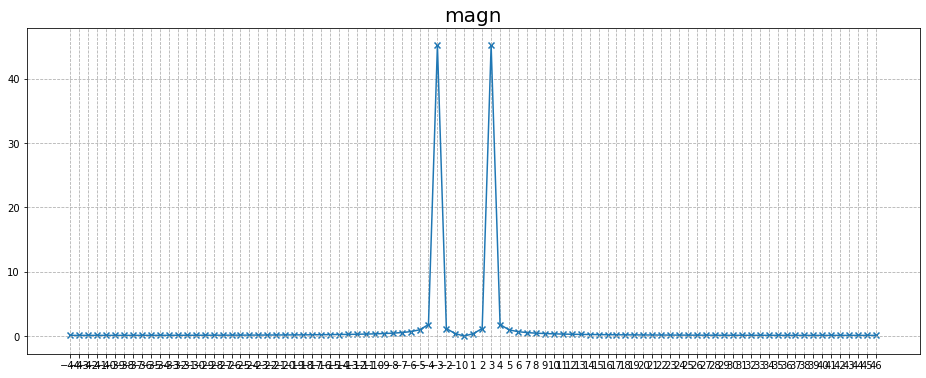

ValueError: x and y must have same first dimension, but have shapes (91,) and (500,)

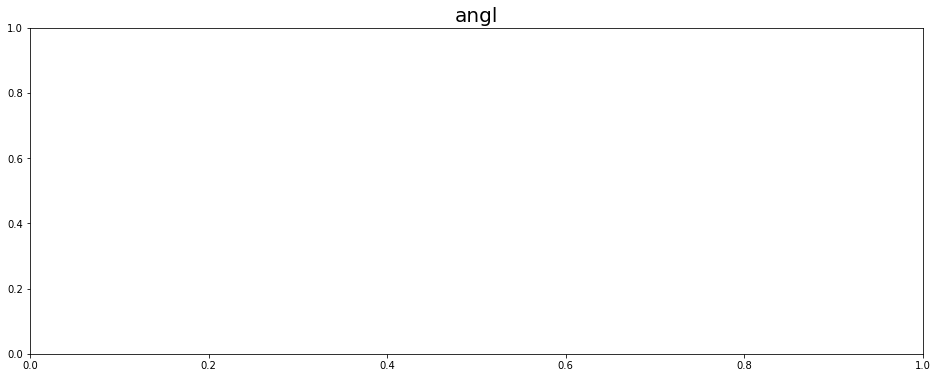

In [229]:
t = np.arange(len(magn_f_y)) - len(magn_f_y) // 2 + 1
plot(t=t, y=shift(magn_f_y), title="magn", step=T)
plot(t=t, y=angl_f_y, title="angl", step=T)

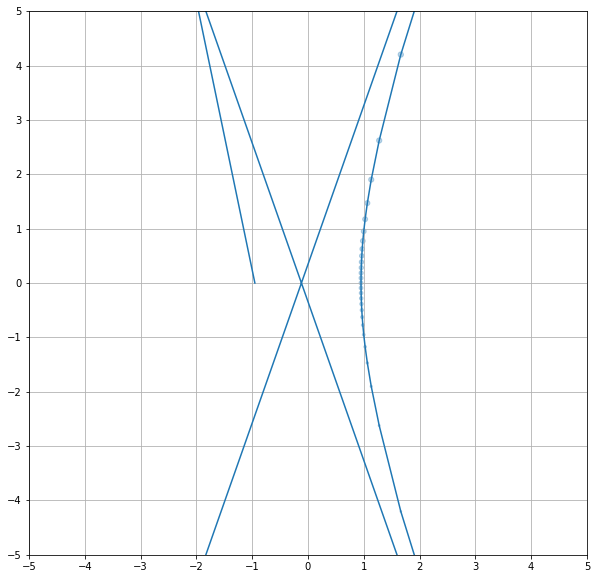

In [168]:
plt.figure(figsize=(10, 10))
plt.plot(real_f_y, imag_f_y)
plt.scatter(x=real_f_y, y=imag_f_y, s=np.arange(len(imag_f_y)), alpha=.3)
l = 5
plt.xticks(np.arange(-10, 11))
plt.yticks(np.arange(-10, 11))
plt.xlim(-l, l)
plt.ylim(-l, l)
plt.grid()
plt.show()

RuntimeError: Requested MovieWriter (ffmpeg) not available

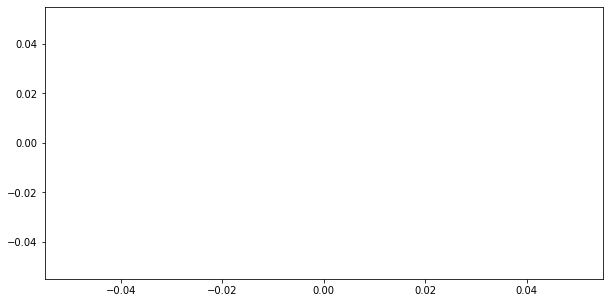

In [106]:
fig, ax = plt.subplots(figsize=(10, 5))
line, = ax.plot(0, 0)
x, y = [], []


def animation_frame(i):
    x.append(i)
    y.append(i)
    line.set_xdata(x)
    line.set_ydata(y)
    return line,


animation = FuncAnimation(fig, func=animation_frame, frames=20, interval=100)
video = animation.to_html5_video()
html = display.HTML(video)
display.clear_output(wait=True)
display.display(html)
plt.close()

In [7]:
# np.fft.fft() : Compute the one-dimensional discrete Fourier Transform.
# np.fft.fft2() : Compute the 2-dimensional discrete Fourier Transform
# np.fft.fftfreq(): Return the Discrete Fourier Transform sample frequencies.
# np.fft.fftn() : Compute the N-dimensional discrete Fourier Transform.
# np.fft.fftshift() : Shift the zero-frequency component to the center of the spectrum.
# np.fft.hfft() : Compute the FFT of a signal that has Hermitian symmetry, i.e., a real spectrum.
# np.fft.rfft() : Compute the one-dimensional discrete Fourier Transform for real input.
np.fft.fft()

TypeError: _fft_dispatcher() missing 1 required positional argument: 'a'

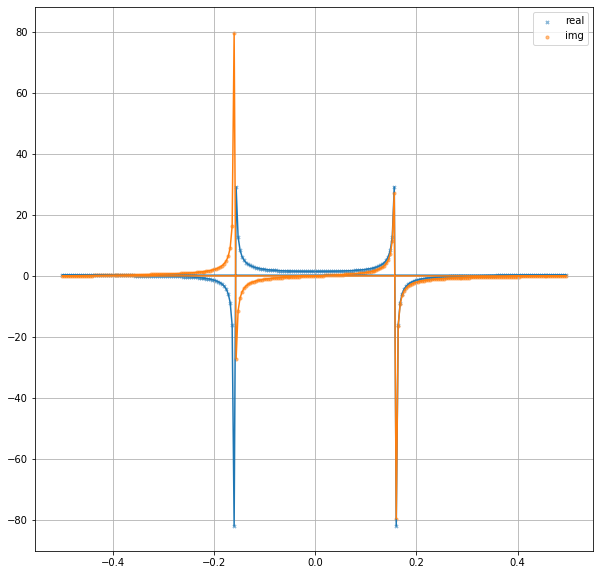

In [15]:
t = np.arange(256)
sp = np.fft.fft(np.sin(t))

freq = np.fft.fftfreq(t.shape[-1])

s = 10
plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(freq, sp.real, s=s, marker="x", label="real", alpha=.5)
plt.plot(freq, sp.real)
plt.scatter(freq, sp.imag, s=s, marker="o", label="img", alpha=.5)
plt.plot(freq, sp.imag)
plt.legend()
plt.show()